In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
Root = "/content/drive/MyDrive/ML"
os.chdir(Root)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
#importing dataset
data = pd.read_csv("/content/drive/MyDrive/ML/survey.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
data.shape

(1259, 27)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Data Cleaning

<Axes: >

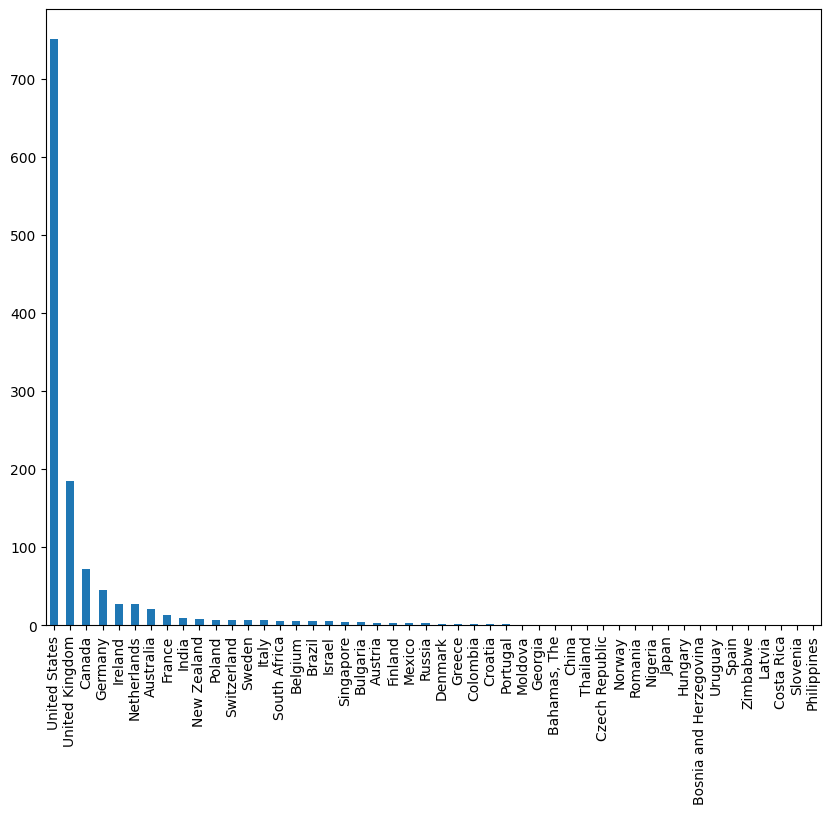

In [8]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [9]:
data.drop(['Country','state','Timestamp','comments'],axis=1,inplace=True)

In [10]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [11]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [12]:
data['self_employed'].fillna('No',inplace=True)

In [13]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [14]:
data['work_interfere'].fillna('N/A',inplace=True)

<Axes: >

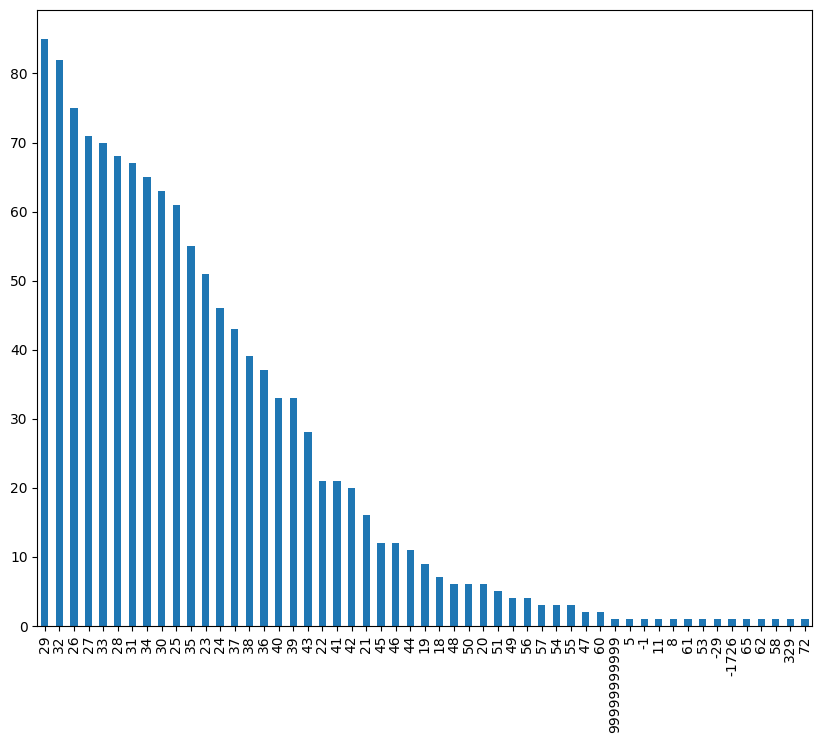

In [15]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

# Data Neutrilization

In [16]:
data.drop(data[(data['Age']>60) | (data['Age'] < 18)].index,inplace=True)

<Axes: >

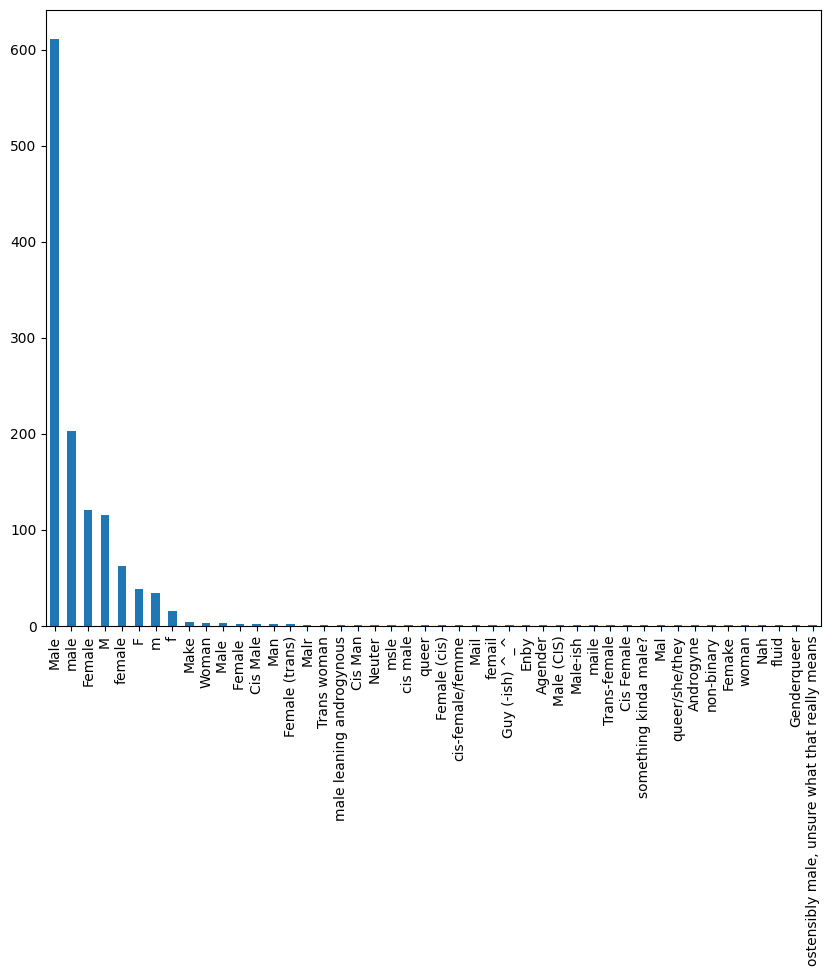

In [17]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [18]:
data['Gender'].replace(['Male','male','M','m','Male ','Cis Male','Man','cis male','Mail','Male (CIS)','Male-ish','maile','Cis Man','male','Malr','Mal','Make','msle'],'Male',inplace=True)

<Axes: >

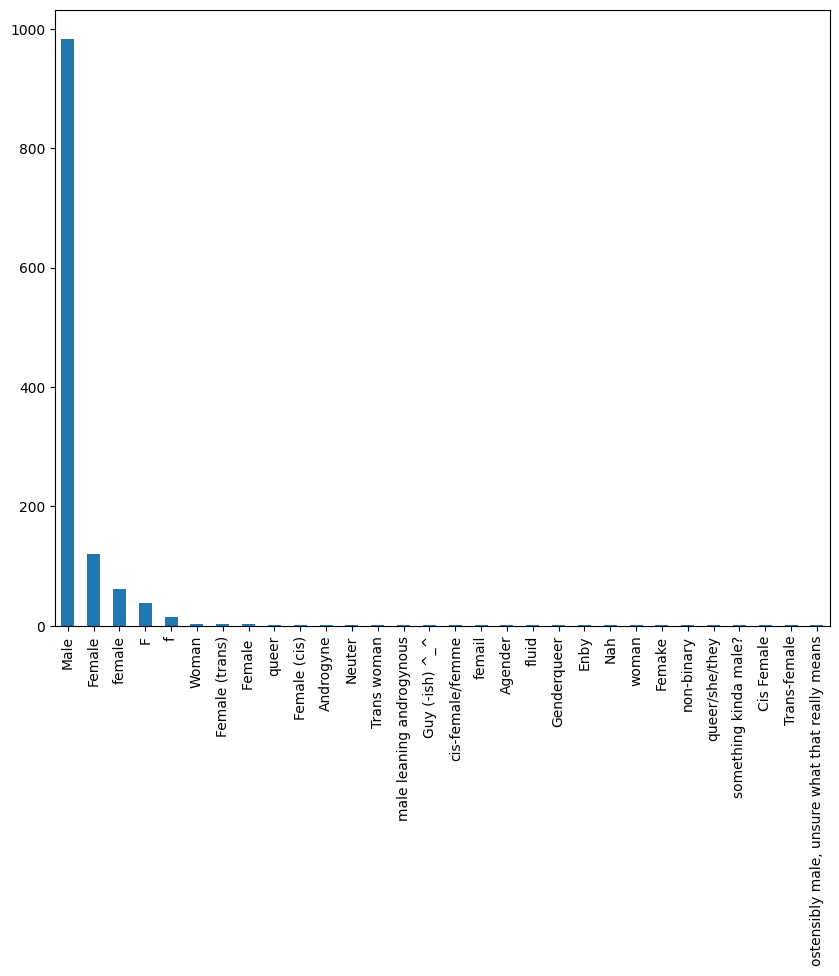

In [19]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [20]:
data['Gender'].replace(['Female','female','F','f','Women','Woman','woman','Female ','Female (cis)','cis-female/femme','femail','women','Femake','Cis Female'],'Female',inplace=True)

<Axes: >

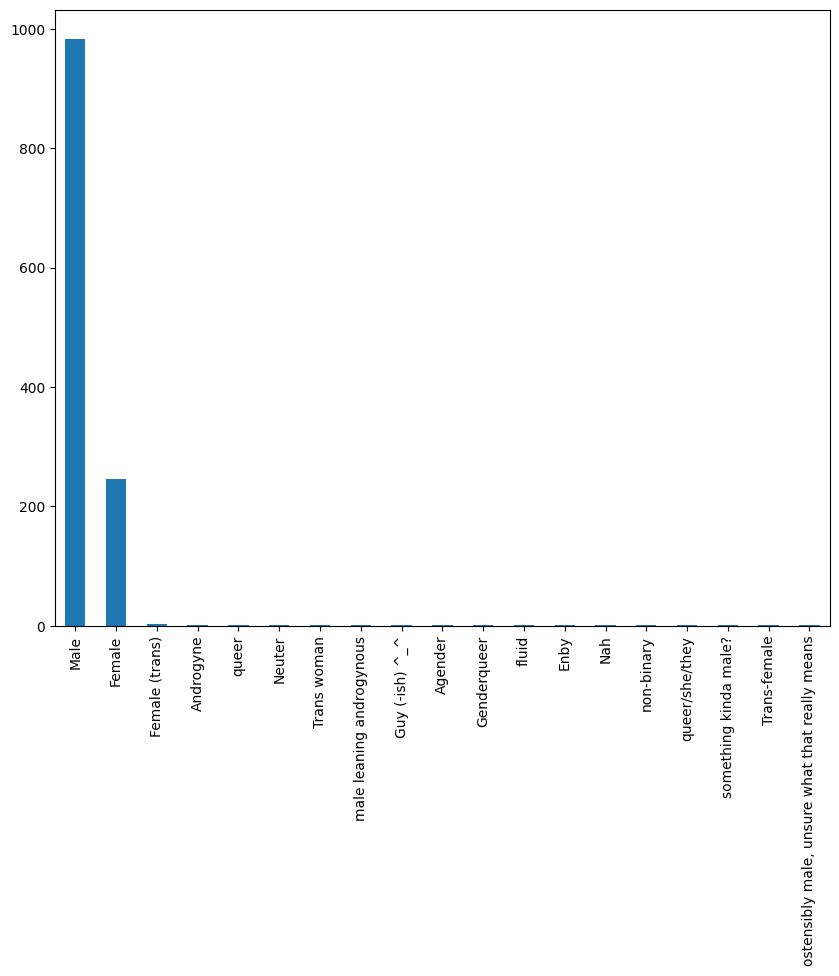

In [21]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [22]:
data['Gender'].replace(['Female (trans)','Androgyne','queer','Neuter','Trans woman','male leaning androgynous','Guy (-ish) ^_^','Agender','Genderqueer','fluid','Enby','Nah','non-binary','queer/she/they','something kinda male?','Trans-female','ostensibly male, unsure what that really means'],'Non-Binary',inplace=True)

<Axes: >

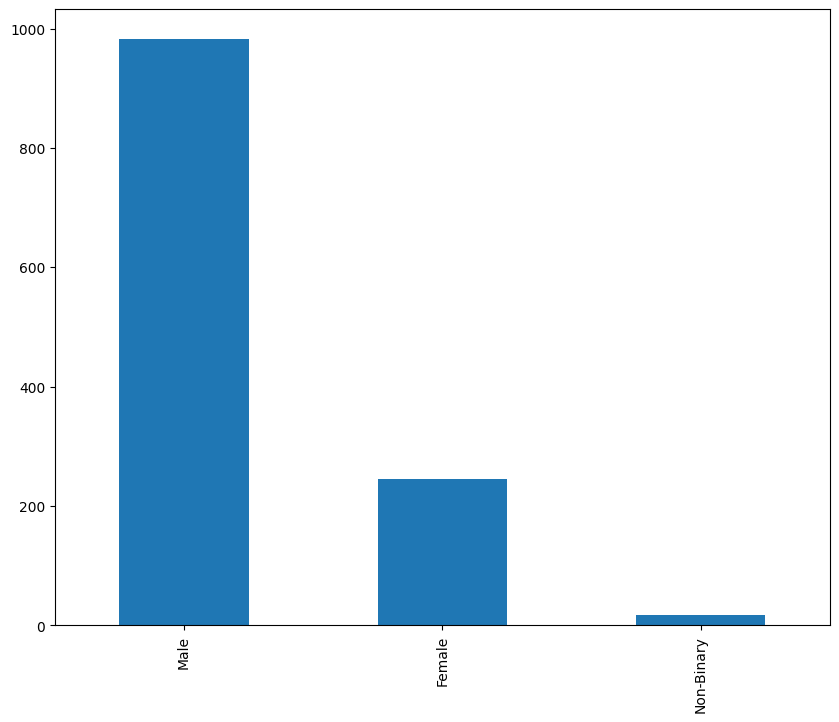

In [23]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

Text(0.5, 9.444444444444438, 'Age')

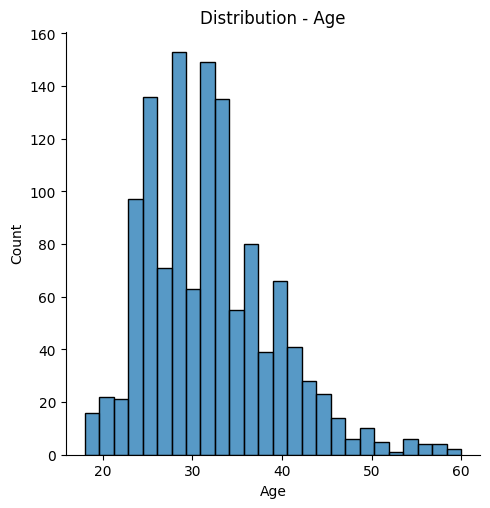

In [24]:
sb.displot(data["Age"])
plt.title("Distribution - Age")
plt.xlabel("Age")

In [25]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1247 non-null   int64 
 1   Gender                     1247 non-null   object
 2   self_employed              1247 non-null   object
 3   family_history             1247 non-null   object
 4   treatment                  1247 non-null   object
 5   work_interfere             1247 non-null   object
 6   no_employees               1247 non-null   object
 7   remote_work                1247 non-null   object
 8   tech_company               1247 non-null   object
 9   benefits                   1247 non-null   object
 10  care_options               1247 non-null   object
 11  wellness_program           1247 non-null   object
 12  seek_help                  1247 non-null   object
 13  anonymity                  1247 non-null   object
 14  leave   

In [27]:
x = data.drop('treatment',axis = 1)
y = data['treatment']

In [28]:
from sklearn. compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [29]:
x = data.drop('treatment',axis = 1)
y = data['treatment']

In [30]:
# Using ColumnTransformer to fetch column data.
ct = ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed','family_history','work_interfere','no_employees','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'])])

In [31]:
x = ct.fit_transform(x)

In [32]:
le = LabelEncoder()
y = le.fit_transform(y)

In [33]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=49)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((872, 21), (375, 21), (872,), (375,))

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, classification_report,auc

In [37]:
model_dict = {}
#Cheack whether which Algorithm returns Maximum Accuracy
model_dict['Logistic regression'] = LogisticRegression(solver='liblinear',random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=49)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier'] = XGBClassifier(random_state=49)

In [38]:
def model_test(X_train,X_test,y_train,y_test,model,model_name):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print("=============================={}==============================".format(model_name))
  print('score is : {}'.format(accuracy))
  print()

In [39]:
for model_name,model in model_dict.items():
  model_test(X_train,X_test,y_train,y_test,model,model_name)

==============================Logistic regression==============================
score is : 0.8506666666666667

==============================KNN Classifier==============================
score is : 0.8133333333333334

==============================Decision Tree Classifier==============================
score is : 0.768

==============================Random Forest Classifier==============================
score is : 0.8293333333333334

==============================AdaBoost Classifier==============================
score is : 0.864

==============================Gradient Boosting Classifier==============================
score is : 0.8453333333333334

==============================XGB Classifier==============================
score is : 0.8133333333333334



In [40]:
# Choosing AdaBoostClassifier Algorithm to Hypertune further.
abc = AdaBoostClassifier(random_state=99)
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)
print('Accuracy of AdaBoost=',accuracy_score(y_test,pred_abc))

Accuracy of AdaBoost= 0.864


In [41]:
# Using RandomizedSearchCV Search Method
from sklearn.model_selection import RandomizedSearchCV
params_abc = {'n_estimators': [int(x) for x in np.linspace(start = 1,stop = 50, num =15)],
              'learning_rate':[(0.97 + x / 100) for x in range(0,8)],
              }
abc_random = RandomizedSearchCV(random_state=49,estimator=abc,param_distributions = params_abc,n_iter = 50,cv=5,n_jobs=-1)

In [42]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [43]:
abc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [44]:
abc_random.best_params_

{'n_estimators': 11, 'learning_rate': 1.0}

In [45]:
# Result after Hypertuning
abc_tuned = AdaBoostClassifier(random_state = 49,n_estimators=11,learning_rate=1.0)
abc_tuned.fit(X_train,y_train)
pred_abc_tuned = abc_tuned.predict(X_test)
print('Accuracy of Adaboost(tuned)=',accuracy_score(y_test,pred_abc_tuned))

Accuracy of Adaboost(tuned)= 0.8693333333333333


Text(50.722222222222214, 0.5, 'Actual')

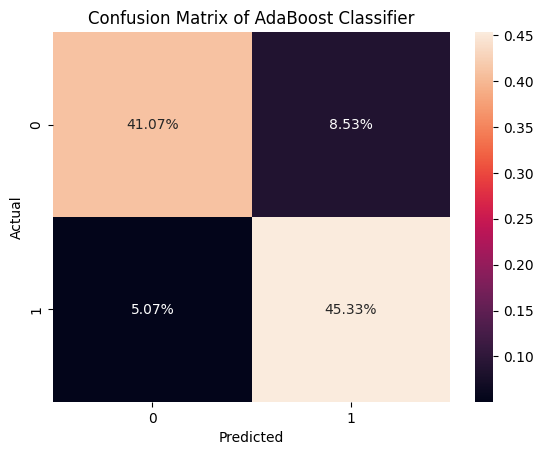

In [46]:
# Confusion matrix for AdaBoost Algo
cf_matrix = confusion_matrix(y_test,pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

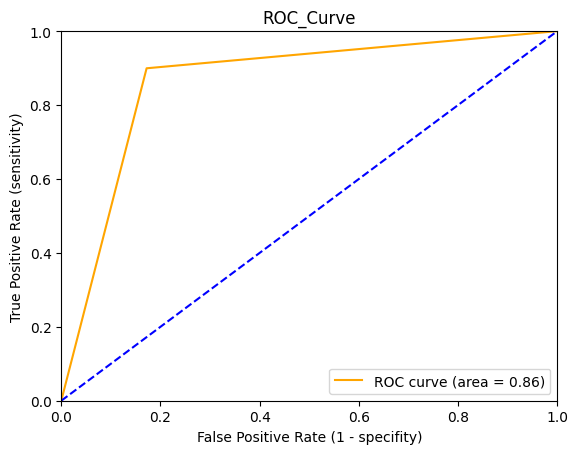

(array([0.        , 0.17204301, 1.        ]),
 array([0.       , 0.8994709, 1.       ]),
 array([2, 1, 0]))

In [47]:
#Generating ROC Curve
from sklearn import metrics
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test,pred_abc)
roc_auc_abc = metrics.auc(fpr_abc,tpr_abc)
plt.plot(fpr_abc,tpr_abc,color='orange',label='ROC curve (area = %0.2f)'%roc_auc_abc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC_Curve')
plt.xlabel('False Positive Rate (1 - specifity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc)

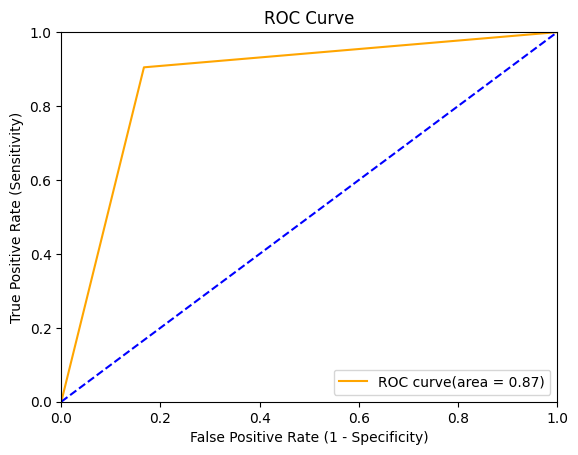

(array([0.        , 0.16666667, 1.        ]),
 array([0.       , 0.9047619, 1.       ]),
 array([2, 1, 0]))

In [48]:
fpr_abc_tuned, tpr_abc_tuned,thresholds_abc_tuned = roc_curve(y_test,pred_abc_tuned)
roc_auc_abc_tuned = metrics.auc(fpr_abc_tuned,tpr_abc_tuned)
plt.plot(fpr_abc_tuned,tpr_abc_tuned,color='orange',label='ROC curve(area = %0.2f)' % roc_auc_abc_tuned)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.show()
roc_curve(y_test,pred_abc_tuned)

In [49]:
# Classification Report after of model
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       186
           1       0.84      0.90      0.87       189

    accuracy                           0.86       375
   macro avg       0.87      0.86      0.86       375
weighted avg       0.87      0.86      0.86       375



In [50]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       186
           1       0.85      0.90      0.87       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [51]:
# Exporting Model by Segmentation(Pickling)
import pickle
pickle.dump(abc_tuned,open('model.sav','wb'))

In [52]:
with open('model.sav', 'rb') as file:
    loaded_model = pickle.load(file)
print(loaded_model)

AdaBoostClassifier(n_estimators=11, random_state=49)


In [53]:
# Function generating screening score for Patient/User
user_screening_score = loaded_model.predict_proba(x)[:, 1]
print(f"User Screening Score: {user_screening_score}")

User Screening Score: [0.53641795 0.49657603 0.51475889 ... 0.54144171 0.42859065 0.55761514]


In [65]:
user_responses = {}

# Ask questions and collect user input
user_responses['Gender'] = input("Your gender? ")
user_responses['Self-employed'] = input("Are you self-employed? (Yes/No) ")
user_responses['Family_history'] = input("Do you have a family history of mental illness? (Yes/No) ")
user_responses['Work_interface'] = input("How do mental health conditions interfere with your work? ")
user_responses['No_employees'] = input("How many employees does your company or organization have? ")
user_responses['Remote_work'] = input("Do you work remotely (outside of an office) at least 50% of the time? (Yes/No) ")
user_responses['Tech_company'] = input("Is your employer primarily a tech company/organization? (Yes/No) ")
user_responses['Benefits'] = input("Does your employer provide mental health benefits? (Yes/No) ")
user_responses['Care_options'] = input("Do you know the options for mental health care your employer provides? (Yes/No) ")
user_responses['Wellness_program'] = input("Has your employer ever discussed mental health as part of an employee wellness program? (Yes/No) ")
user_responses['Seek_help'] = input("Does your employer provide resources to learn more about mental health issues and how to seek help? (Yes/No) ")
user_responses['Anonymity'] = input("Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? (Yes/No) ")
user_responses['Leave'] = input("How easy is it for you to take medical leave for a mental health condition? ")
user_responses['Mental_health_consequence'] = input("Do you think that discussing a mental health issue with your employer would have negative consequences? (Yes/No) ")
user_responses['Phys_health_consequence'] = input("Do you think that discussing a physical health issue with your employer would have negative consequences? (Yes/No) ")
user_responses['Coworkers'] = input("Would you be willing to discuss a mental health issue with your coworkers? (Yes/No) ")
user_responses['Supervisor'] = input("Would you be willing to discuss a mental health issue with your direct supervisor? (Yes/No) ")
user_responses['Mental_health_interview'] = input("Would you bring up a mental health issue with a potential employer in an interview? (Yes/No) ")
user_responses['Phys_health_interview'] = input("Would you bring up a physical health issue with a potential employer in an interview? (Yes/No) ")
user_responses['Mental_vs_physical'] = input("Do you feel that your employer takes mental health as seriously as physical health? (Yes/No) ")
user_responses['Obs_consequence'] = input("Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? (Yes/No) ")

# Print the collected user responses
print("User Responses:", user_responses)

label_encoder = LabelEncoder()
for column in ['Gender', 'Self-employed', 'Family_history', 'Work_interface', 'No_employees',
                   'Remote_work', 'Tech_company', 'Benefits', 'Care_options', 'Wellness_program',
                   'Seek_help', 'Anonymity', 'Leave', 'Mental_health_consequence',
                   'Phys_health_consequence', 'Coworkers', 'Supervisor', 'Mental_health_interview',
                   'Phys_health_interview', 'Mental_vs_physical', 'Obs_consequence']:
    user_responses[column] = label_encoder.fit_transform([user_responses[column]])[0]


# Creating a feature vector for the model input
features = [user_responses[column] for column in user_responses.keys()]
user_input = np.array(features).reshape(1, -1)

# Using the loaded model to predict the screening score
user_screening_score = loaded_model.predict_proba(user_input)[:, 1]

# Outputting the screening score
print(f"User Screening Score: {user_screening_score}")

Your gender? Male
Are you self-employed? (Yes/No) No
Do you have a family history of mental illness? (Yes/No) Yes
How do mental health conditions interfere with your work? Sometimes
How many employees does your company or organization have? 26-100
Do you work remotely (outside of an office) at least 50% of the time? (Yes/No) No
Is your employer primarily a tech company/organization? (Yes/No) No
Does your employer provide mental health benefits? (Yes/No) Yes
Do you know the options for mental health care your employer provides? (Yes/No) Yes
Has your employer ever discussed mental health as part of an employee wellness program? (Yes/No) No
Does your employer provide resources to learn more about mental health issues and how to seek help? (Yes/No) No
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? (Yes/No) Yes
How easy is it for you to take medical leave for a mental health condition? Don't know
Do you think that discuss